## Importing Libraries

In [166]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Loading Dataset

In [168]:
data = pd.read_csv('Spam Email.csv')

In [169]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [170]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [171]:
data.shape

(5572, 5)

## Cleaning Data 

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [127]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [128]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [129]:
data.rename(columns={'v1':'target','v2':'text'},inplace=True)
data.head(2)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [130]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['target'] = encoder.fit_transform(data['target'])

In [131]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [132]:
# remove duplicates
data = data.drop_duplicates(keep='first')
data.duplicated().sum()

0

In [133]:
data.shape

(5163, 2)

## Exploratory Data Analysis 

In [134]:
data['target'].value_counts()

target
0    4516
1     647
Name: count, dtype: int64

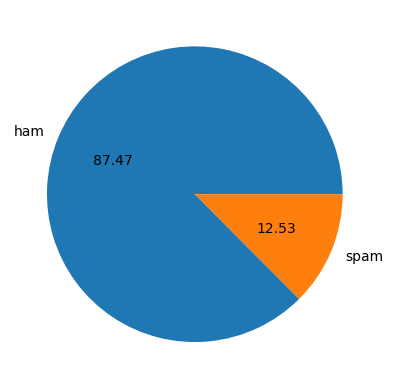

In [135]:
plt.pie(data['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [172]:
import nltk

In [173]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91991\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [174]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [139]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [140]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [141]:
data['transformed_text'] = data['text'].apply(transform_text)

C:\Users\91991\AppData\Local\Temp\ipykernel_1188\2902741962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['transformed_text'] = data['text'].apply(transform_text)


In [142]:
data.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


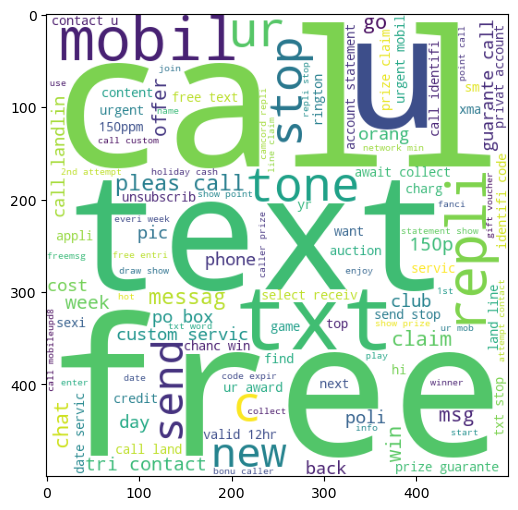

In [143]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(8,6))
plt.imshow(spam_wc)

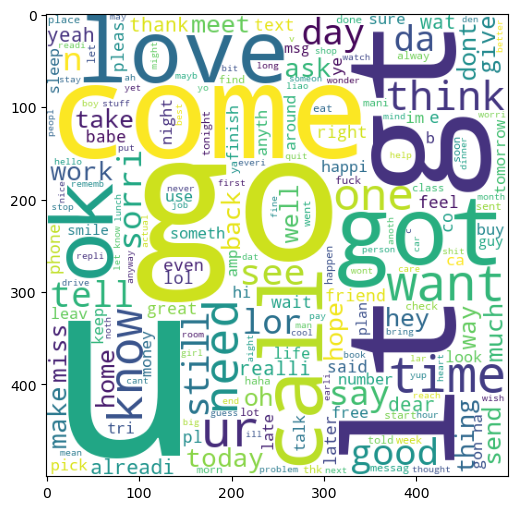

In [144]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(6,6))
plt.imshow(ham_wc)

In [145]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [175]:
len(spam_corpus)

9861

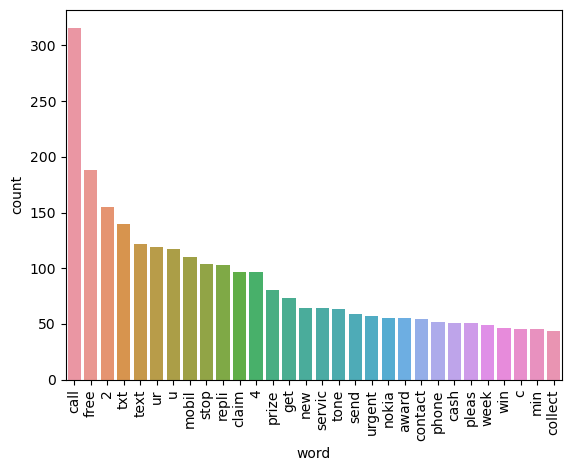

In [147]:
from collections import Counter
most_common_words = Counter(spam_corpus).most_common(30)

df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()

In [148]:
ham_corpus = []
for msg in data[data['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [176]:
len(ham_corpus)

35306

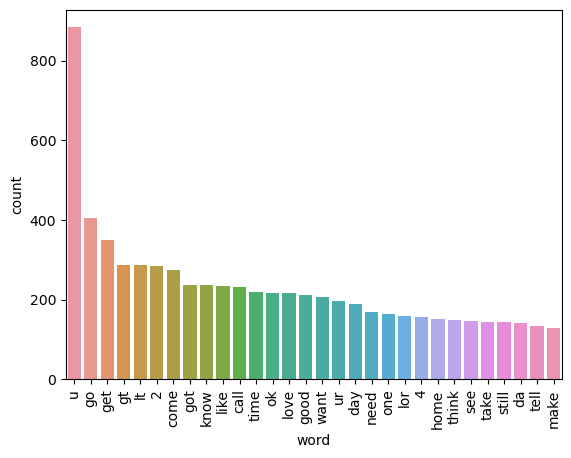

In [150]:
most_common_words = Counter(ham_corpus).most_common(30)

df_most_common = pd.DataFrame(most_common_words, columns=['word', 'count'])

sns.barplot(x='word', y='count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()

In [151]:
data.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


## Model Building 

In [152]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [153]:
x = tfidf.fit_transform(data['transformed_text']).toarray()

In [154]:
y = data['target'].values

In [177]:
print(x.shape)
print(y.shape)

(5163, 3000)
(5163,)


In [156]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [179]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svcc = SVC(kernel='sigmoid', gamma=1.0)
knnc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)

In [178]:
clfs = {
    'SVC' : svcc,
    'KNN' : knnc,
    'DT': dtc, 
    'LR': lrc, 
}

In [180]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [160]:
train_classifier(svcc,x_train,y_train,x_test,y_test)

(0.978702807357212, 0.9805825242718447)

In [161]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.978702807357212
Precision -  0.9805825242718447
For  KNN
Accuracy -  0.9186834462729913
Precision -  1.0
For  DT
Accuracy -  0.936108422071636
Precision -  0.8089887640449438
For  LR
Accuracy -  0.9554695062923524
Precision -  0.9310344827586207


In [162]:
performance_df = pd.DataFrame({
    'Classifier': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)
print(performance_df)

  Classifier  Accuracy  Precision
1        KNN  0.918683   1.000000
0        SVC  0.978703   0.980583
3         LR  0.955470   0.931034
2         DT  0.936108   0.808989


In [163]:
performance_df1 = pd.melt(performance_df,id_vars='Classifier')

C:\Users\91991\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


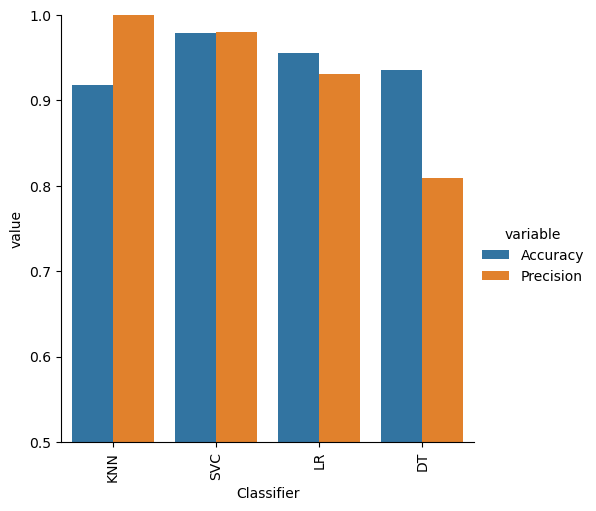

In [164]:
sns.catplot(x = 'Classifier', y='value',hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1)
plt.xticks(rotation='vertical')
plt.show()

In [181]:
clf = svcc
clf.fit(x_train, y_train)
def preprocess_and_transform(texts):
    transformed_texts = [transform_text(text) for text in texts]
    text_features = tfidf.transform(transformed_texts).toarray()
    
    return text_features

emails = [
     "Congratulations! You've won a $1,000 Walmart gift card. Click here to claim now.",
    "Reminder: Your bill payment is due tomorrow.",
    "URGENT: Update your account information immediately to avoid suspension.",
    "Claim your exclusive vacation package now! Limited slots available.",
    "Your order has been shipped. Track your package with this link.",
    "You've been selected for a chance to win a new iPhone. Enter now!"
]
features= preprocess_and_transform(emails)

pred= clf.predict(features)

predictions_labels = ['ham' if label == 0 else 'spam' for label in pred]

for email, label in zip(emails, predictions_labels):
    print(f"Email: {email}\nPrediction: {label}\n")


Email: Congratulations! You've won a $1,000 Walmart gift card. Click here to claim now.
Prediction: spam

Email: Reminder: Your bill payment is due tomorrow.
Prediction: ham

Email: URGENT: Update your account information immediately to avoid suspension.
Prediction: spam

Email: Claim your exclusive vacation package now! Limited slots available.
Prediction: ham

Email: Your order has been shipped. Track your package with this link.
Prediction: ham

Email: You've been selected for a chance to win a new iPhone. Enter now!
Prediction: spam

